In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv
/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer

In [3]:
path = Path('/kaggle/input/playground-series-s4e1')
original_data = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
train = pd.read_csv(str(path)+'/train.csv')
test = pd.read_csv(str(path)+'/test.csv')

In [4]:
original_data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0


In [5]:
train.head(2)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0


In [6]:
train = pd.concat([original_data.drop('RowNumber',axis=1),train.drop('id',axis=1)])

In [7]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [8]:
def missing_value(df):
    for col in df.columns.tolist():
        print('{} missing values : {}'.format(col, df[col].isnull().sum()))

In [9]:
missing_value(train)

CustomerId missing values : 0
Surname missing values : 0
CreditScore missing values : 0
Geography missing values : 1
Gender missing values : 0
Age missing values : 1
Tenure missing values : 0
Balance missing values : 0
NumOfProducts missing values : 0
HasCrCard missing values : 1
IsActiveMember missing values : 1
EstimatedSalary missing values : 0
Exited missing values : 0


In [10]:
train = train.dropna()

Target

<Axes: xlabel='Exited'>

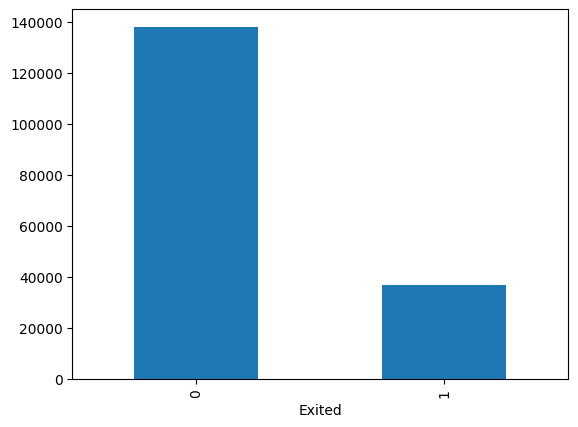

In [11]:
train['Exited'].value_counts().plot(kind='bar')

<Axes: >

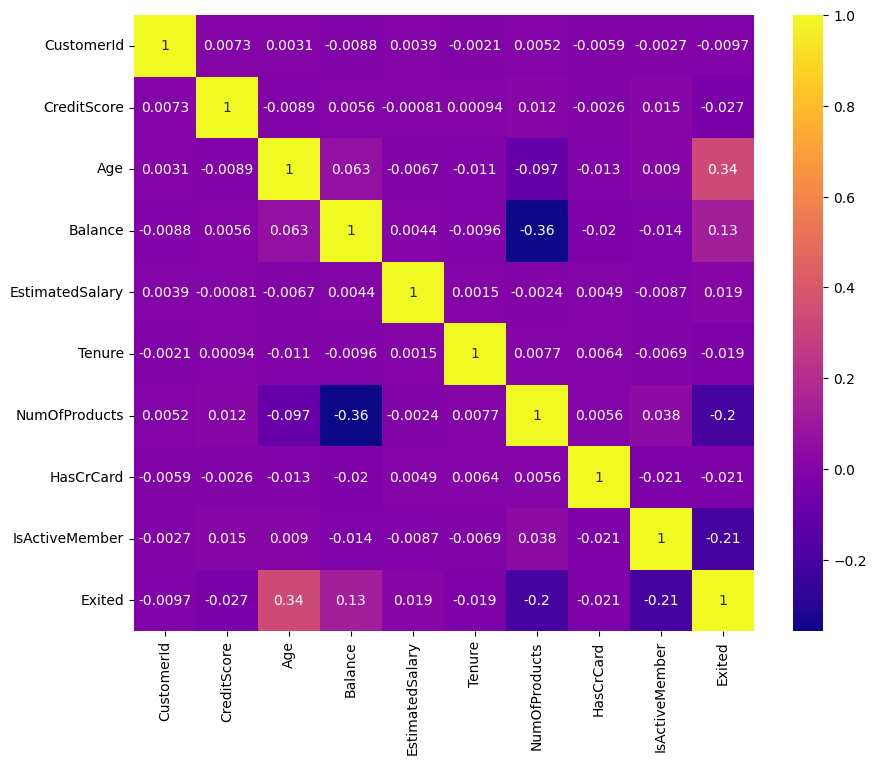

In [12]:
temp = train[['CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]
temp_corr = temp.corr()
plt.figure(figsize=(10,8))
sns.heatmap(temp_corr,annot=True,cmap=('plasma'))

Correlation Coefficient of all the Features
Exited             1.000000
Age                0.336608
Balance            0.128387
EstimatedSalary    0.018598
CustomerId        -0.009722
Tenure            -0.019250
HasCrCard         -0.021117
CreditScore       -0.027229
NumOfProducts     -0.204494
IsActiveMember    -0.207210
Name: Exited, dtype: float64


<Axes: xlabel='Exited', ylabel='IsActiveMember'>

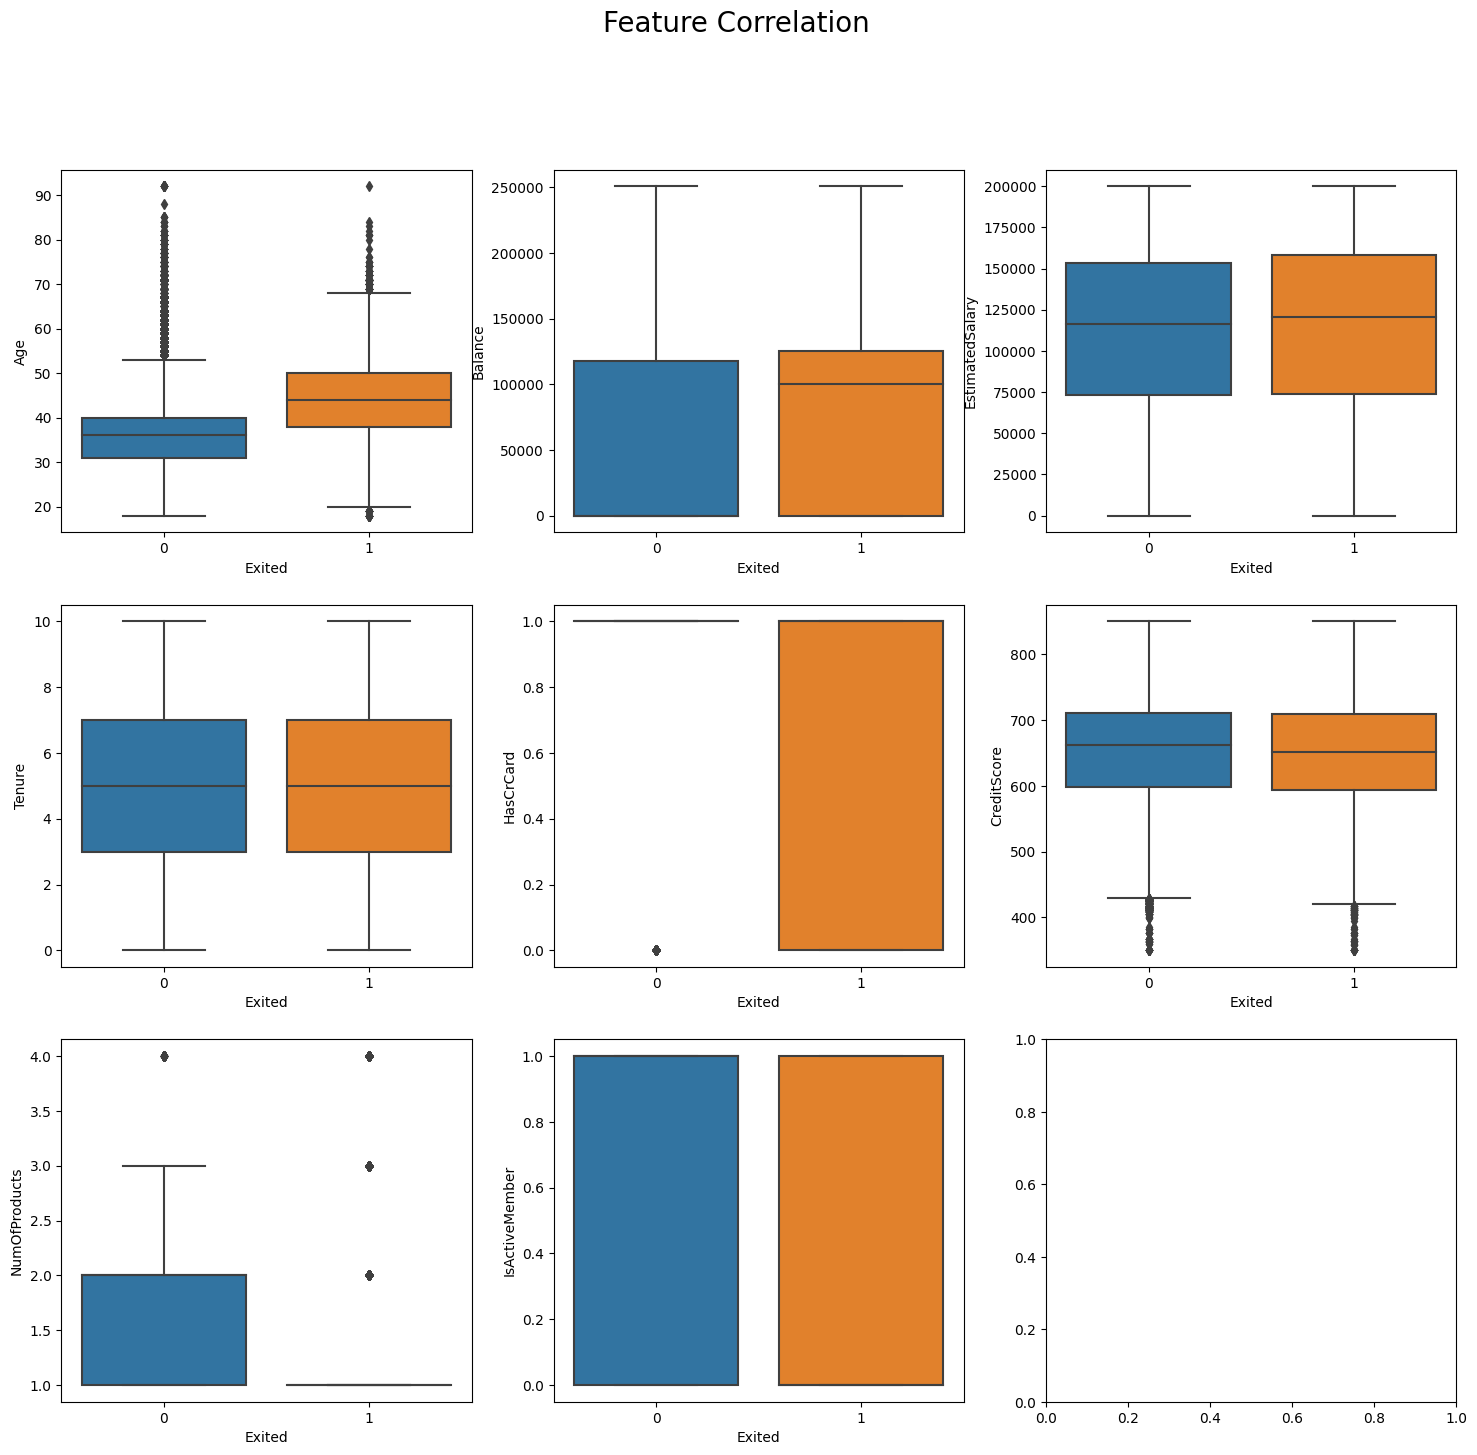

In [13]:
temp = train[['CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]
print("Correlation Coefficient of all the Features")
temp_corr = temp.corr()
temp_corr.sort_values(["Exited"], ascending = False, inplace = True)
print(temp_corr.Exited)

f,axes = plt.subplots(nrows=3, ncols=3,figsize=(18,16))

f.suptitle('Feature Correlation', size=20)
sns.boxplot(x="Exited", y="Age", data=train, ax=axes[0,0])
sns.boxplot(x="Exited", y="Balance", data=train, ax=axes[0,1])
sns.boxplot(x="Exited", y="EstimatedSalary", data=train, ax=axes[0,2])
sns.boxplot(x="Exited", y="Tenure", data=train, ax=axes[1,0])
sns.boxplot(x="Exited", y="HasCrCard", data=train, ax=axes[1,1])
sns.boxplot(x="Exited", y="CreditScore", data=train, ax=axes[1,2])
sns.boxplot(x="Exited", y="NumOfProducts", data=train, ax=axes[2,0])
sns.boxplot(x="Exited", y="IsActiveMember", data=train, ax=axes[2,1])

surname relation with target

In [14]:
train['Surname'].value_counts()

Surname
Hsia         2474
T'ien        2300
Hs?          1626
Maclean      1601
Kao          1597
             ... 
Charteris       1
Mahomed         1
Fernie          1
Bardin          1
Bibb            1
Name: count, Length: 2932, dtype: int64

In [15]:
train['Surname'].nunique()

2932

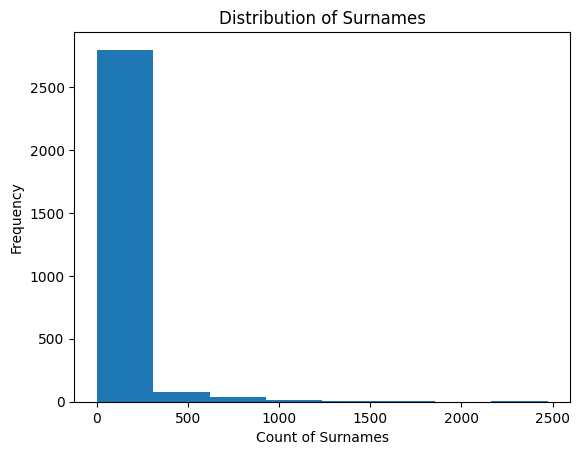

In [16]:
train['Surname'].value_counts().plot(kind='hist',bins=8)
plt.xlabel('Count of Surnames')
plt.ylabel('Frequency')
plt.title('Distribution of Surnames')
plt.show()

In [17]:
train.groupby('Surname')['Exited'].describe()

,count,mean,std,min,25%,50%,75%,max
Surname,,,,,,,,
Abazu,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Abbie,5.0,0.200000,0.447214,0.0,0.00,0.0,0.00,1.0
Abbott,28.0,0.142857,0.356348,0.0,0.00,0.0,0.00,1.0
Abdullah,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
Abdulov,14.0,0.214286,0.425815,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
Zubarev,10.0,0.100000,0.316228,0.0,0.00,0.0,0.00,1.0
Zubareva,2.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Zuev,20.0,0.150000,0.366348,0.0,0.00,0.0,0.00,1.0


feature engineering

In [18]:
def feature_engineer(df):
    
    df['Age_level'] = pd.cut(df['Age'],bins=[18, 30, 40, 50, 60, 100],
                  labels=['18-30', '30-40', '40-50', '50-60', '60+'])
    df['Creditscore_level'] = pd.cut(df['CreditScore'],
    bins=[0,300,600,700,800,900], labels=['0-300', '300-600', '600-700',
                                          '700-800', '900+'])             
    Avg_balance_geo = df.groupby('Geography')['Balance'].mean()
    df['Avg_balance_geo'] = df['Geography'].map(Avg_balance_geo)
    
    Surname_freq = df['Surname'].value_counts()
    df['Surname_freq'] = df['Surname'].map(Surname_freq)
    return df

In [19]:
train = feature_engineer(train)
test = feature_engineer(test)

In [20]:
train = train.drop(['Surname','CustomerId'],axis=1)
test = test.drop(['Surname','CustomerId'],axis=1)

In [21]:
train_df=train.copy()
test_df = test.copy()

# pre-processing

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in train_df.columns[1:]:
    if train_df[col].dtype == 'object' and test_df[col].dtype == 'object':
        train_df[col] = label_encoder.fit_transform(train_df[col].astype(str))
        test_df[col] = label_encoder.transform(test_df[col].astype(str))

In [23]:
from sklearn.preprocessing import OneHotEncoder

categ_cols = train_df.select_dtypes(include = ['category']).columns
train_df = pd.get_dummies(train_df,columns=categ_cols)
test_df = pd.get_dummies(test_df,columns=categ_cols)

train_df = train_df.replace({True: 1, False: 0})
test_df = test_df.replace({True: 1, False: 0})

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler_cols = ['Age', 'Balance', 'EstimatedSalary', 'Avg_balance_geo', 'Surname_freq']

scaler = MinMaxScaler()
train_df[scaler_cols] = scaler.fit_transform(train_df[scaler_cols])
test_df[scaler_cols] = scaler.transform(test_df[scaler_cols])

In [25]:
train_df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Age_level_18-30,Age_level_30-40,Age_level_40-50,Age_level_50-60,Age_level_60+,Creditscore_level_0-300,Creditscore_level_300-600,Creditscore_level_600-700,Creditscore_level_700-800,Creditscore_level_900+
0,619,0,0,0.324324,2,0.000000,1,1.0,1.0,0.506735,...,0,0,1,0,0,0,0,1,0,0
1,608,2,0,0.310811,1,0.334031,1,0.0,1.0,0.562709,...,0,0,1,0,0,0,0,1,0,0


In [26]:
test_df.head(2)

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Age_level_18-30,Age_level_30-40,Age_level_40-50,Age_level_50-60,Age_level_60+,Creditscore_level_0-300,Creditscore_level_300-600,Creditscore_level_600-700,Creditscore_level_700-800,Creditscore_level_900+
0,165034,586,0,0,0.067568,2,0.0,2,0.0,1.0,...,1,0,0,0,0,0,1,0,0,0
1,165035,683,0,0,0.378378,2,0.0,1,1.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [27]:
print(missing_value(train_df),'\n')
print(missing_value(test_df))

CreditScore missing values : 0
Geography missing values : 0
Gender missing values : 0
Age missing values : 0
Tenure missing values : 0
Balance missing values : 0
NumOfProducts missing values : 0
HasCrCard missing values : 0
IsActiveMember missing values : 0
EstimatedSalary missing values : 0
Exited missing values : 0
Avg_balance_geo missing values : 0
Surname_freq missing values : 0
Age_level_18-30 missing values : 0
Age_level_30-40 missing values : 0
Age_level_40-50 missing values : 0
Age_level_50-60 missing values : 0
Age_level_60+ missing values : 0
Creditscore_level_0-300 missing values : 0
Creditscore_level_300-600 missing values : 0
Creditscore_level_600-700 missing values : 0
Creditscore_level_700-800 missing values : 0
Creditscore_level_900+ missing values : 0
None 

id missing values : 0
CreditScore missing values : 0
Geography missing values : 0
Gender missing values : 0
Age missing values : 0
Tenure missing values : 0
Balance missing values : 0
NumOfProducts missing values :

In [28]:
print('X_train shape: {}'.format(train_df.shape))
print('X_test shape: {}'.format(test_df.shape))

X_train shape: (175032, 23)
X_test shape: (110023, 23)


In [29]:
X = train_df.drop('Exited',axis=1)
y = train_df['Exited']
X_test = test_df.drop('id',axis=1)

# Baseline Models

In [30]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', 
                                 random_state=7, class_weight='balanced')))

models.append((' LGBM Classifie', LGBMClassifier()))

models.append(('CatBoost Classifier',CatBoostClassifier()))



In [31]:
results = []

# Evaluate each model using k-fold cross-validation
for name, model in models:
    sfk = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for train_index, test_index in sfk.split(X, y):
        X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[test_index]

        # Train your model on X_train, y_train, and then evaluate on X_valid, y_valid

    cv_results = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='roc_auc', n_jobs=-1)
    results.append({
        'Model': name,
        'ROC AUC Mean': cv_results.mean(),
        'ROC AUC Std': cv_results.std()
    })

results_df = pd.DataFrame(results)

print(results_df)

Learning rate set to 0.089373
0:	learn: 0.6108211	total: 246ms	remaining: 4m 6s
1:	learn: 0.5484232	total: 412ms	remaining: 3m 25s
2:	learn: 0.5025792	total: 551ms	remaining: 3m 2s
3:	learn: 0.4678058	total: 708ms	remaining: 2m 56s
4:	learn: 0.4402560	total: 864ms	remaining: 2m 51s
5:	learn: 0.4177237	total: 1.01s	remaining: 2m 47s
6:	learn: 0.3996785	total: 1.16s	remaining: 2m 44s
7:	learn: 0.3863152	total: 1.3s	remaining: 2m 40s
8:	learn: 0.3759845	total: 1.43s	remaining: 2m 37s
9:	learn: 0.3672136	total: 1.58s	remaining: 2m 36s
10:	learn: 0.3601868	total: 1.74s	remaining: 2m 36s
11:	learn: 0.3546745	total: 1.88s	remaining: 2m 34s
12:	learn: 0.3499812	total: 2.02s	remaining: 2m 33s
13:	learn: 0.3457964	total: 2.16s	remaining: 2m 32s
14:	learn: 0.3424516	total: 2.31s	remaining: 2m 32s
15:	learn: 0.3395884	total: 2.47s	remaining: 2m 31s
16:	learn: 0.3376911	total: 2.62s	remaining: 2m 31s
17:	learn: 0.3360798	total: 2.76s	remaining: 2m 30s
18:	learn: 0.3340708	total: 2.9s	remaining: 2m 

In [32]:
print(results_df)

                 Model  ROC AUC Mean  ROC AUC Std
0  Logistic Regression      0.824677     0.004018
1       LGBM Classifie      0.890353     0.003875
2  CatBoost Classifier      0.891123     0.003550


In [33]:
catboost_params = { 'iterations': 398,
                    'colsample_bylevel': 0.6963459781979415,
                    'learning_rate': 0.10304917629217605,
                    'random_strength': 0.06085528581164544,
                    'depth': 5,
                    'l2_leaf_reg': 3,
                    'boosting_type': 'Plain',
                    'bootstrap_type': 'Bernoulli',
                    'subsample': 0.7140099695149456}


In [34]:
best_model = CatBoostClassifier(**catboost_params,random_state=42,verbose=0)
best_model.fit(X,y)

In [35]:
preds = best_model.predict_proba(X_test)[:,1]


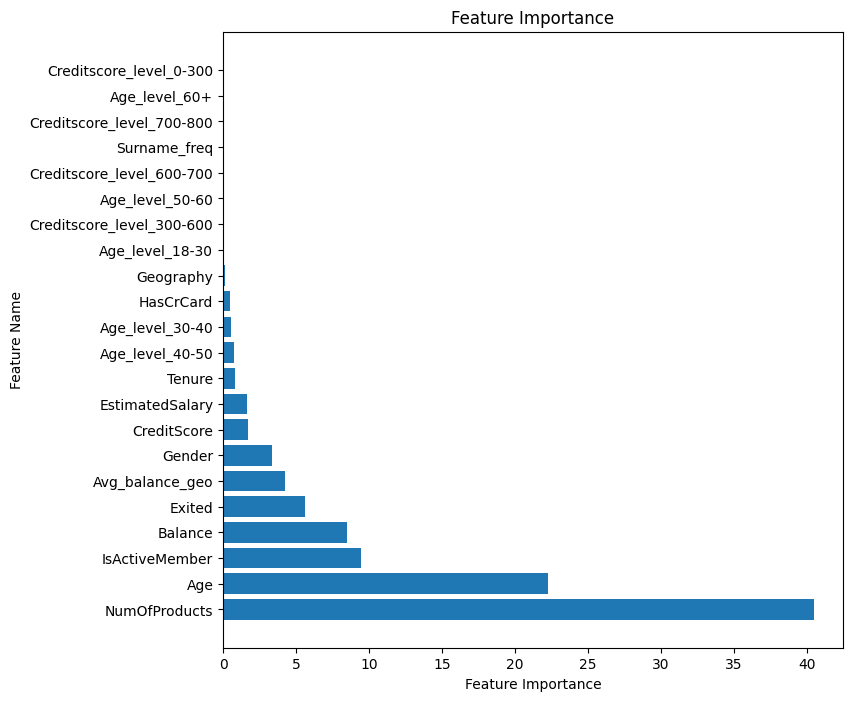

In [36]:
feature_importances = best_model.feature_importances_
feature_names = train_df.columns 
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance_scores = zip(*sorted_feature_importance)
plt.figure(figsize=(8, 8))

plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()

In [37]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
sample_submission['Exited'] = preds
sample_submission.to_csv('submission.csv', index = False)